<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#деление-выборок" data-toc-modified-id="деление-выборок-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>деление выборок</a></span></li><li><span><a href="#кодирование" data-toc-modified-id="кодирование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>кодирование</a></span></li><li><span><a href="#масштабирование-признаков" data-toc-modified-id="масштабирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>масштабирование признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Cлучайный-лес" data-toc-modified-id="Cлучайный-лес-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cлучайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#f1-мера-лучшей-модели" data-toc-modified-id="f1-мера-лучшей-модели-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>f1-мера лучшей модели</a></span></li><li><span><a href="#метрика-AUC-ROC-лучшей-модели" data-toc-modified-id="метрика-AUC-ROC-лучшей-модели-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>метрика AUC-ROC лучшей модели</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from IPython.display import Markdown as md

In [4]:
df = pd.read_csv('datasets/churn.csv')
df.columns = df.columns.str.lower()

#сразу проверим пропуски
df.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


познакомимся с датафреймом

In [6]:
#df=df.dropna()

НЕ убираем пропуски))

In [7]:
df['tenure']=df['tenure'].fillna(-1)

<AxesSubplot:>

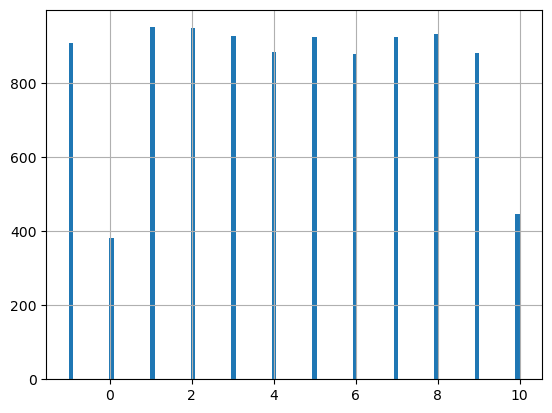

In [8]:
df['tenure'].hist(bins=100)

In [9]:
df=df.drop(['surname','rownumber'], axis=1)

уберем surname чтобы избежать чрезмерного увеличения таблицы при кодирования.

так же уберем rownumber(старый индекс)

In [10]:
df=df.drop(['customerid'],axis=1)


<div class="alert alert-block alert-info">
<b>Изменения:</b> избавляемся от customer_id
</div>

In [11]:
##df_ohe = pd.get_dummies(df2)
##features_ohe = df_ohe.drop(['exited'], axis=1)
##target_ohe = df_ohe['exited']

In [12]:
#features_ohe.columns

### деление выборок

<div class="alert alert-block alert-info">
<b>Изменения:</b> делим на три, в соотношении 3:1:1
</div>

In [13]:
features = df.drop(['exited'], axis=1)
target = df['exited']

features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp,target_temp,test_size=0.5,train_size=0.5,random_state=12345)

print('Размеры выборок: Обучающая -',round(features_train.shape[0]/df.shape[0],2),', валидационная -', 
      round(features_valid.shape[0]/df.shape[0],2), 'тестовая - ',round(features_test.shape[0]/df.shape[0],2))

Размеры выборок: Обучающая - 0.6 , валидационная - 0.2 тестовая -  0.2


### кодирование

In [69]:
features_train = pd.get_dummies(features_train, drop_first=True)

features_valid = pd.get_dummies(features_valid, drop_first=True)

features_test = pd.get_dummies(features_test, drop_first=True)

### масштабирование признаков

In [70]:
numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']

scaler=StandardScaler()

scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод

убран столбец с фамилией,  чтобы избежать увеличения датафрейма при кодировании.

убраны столбец rownumber, customerid ( не нужны для обучения )

обработаны пропуски в tenure 

выборки разделены в соотношении 3:1:1

применено кодирование признаков

проведено масштабирование признаков

## Исследование задачи

### Исследуем баланс классов

In [16]:
target_train.value_counts()

0    4804
1    1196
Name: exited, dtype: int64

посмотрим точность модели без учета дисбаланса

In [17]:
model = RandomForestClassifier(random_state=333)

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
f1=f1_score(target_valid,predicted_valid)
f1

0.5727136431784108

также вычислим метрику AUC-ROC

In [83]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8502138290214676

метрика f1 составила 0.57- есть к чему стремиться, но и не самый худший результат. посмотрим что получится после борьбы с дисбалансом

построим ROC- кривую чтобы понять насколько наша модель отличается от случайной

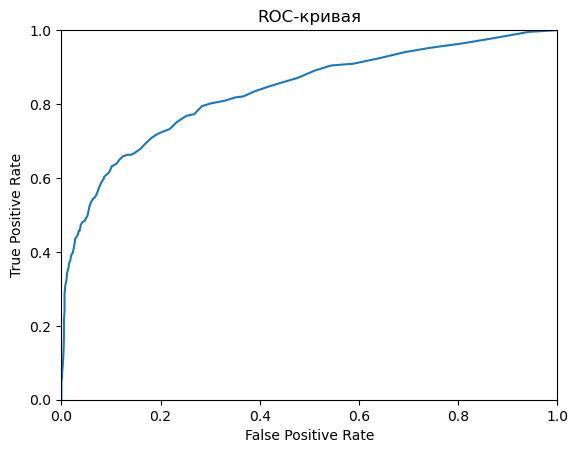

In [19]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели. 

### Вывод

f1-меру нужно увеличивать, дисбаланс присутствует

## Борьба с дисбалансом

Чтобы увеличить качество модели при дисбалансе классов применим: взвешивание классов, upsampling и downsampling

### Взвешивание классов

сначала применим аргумент взвешивание классов и посмотрим на результат

In [20]:
model = RandomForestClassifier(random_state=444, class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid=model.predict(features_valid)
f1=f1_score(target_valid, predicted_valid)

print("F1:", f1)

F1: 0.5591397849462365


метрика даже снизилась на 0.04, продолжаем борьбу

### Upsampling

Теперь применим upsampling:

In [21]:
def upsample(features, target, repeat, random):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=random)
    target_upsampled = shuffle(target_upsampled, random_state=random)
    
    return features_upsampled,target_upsampled

In [22]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 2, 777)
model = RandomForestClassifier(random_state=12345)
model.fit(features_train_upsampled, target_train_upsampled)
predicted_valid=model.predict(features_valid)
f1=f1_score(target_valid, predicted_valid)
print("F1:", f1)

F1: 0.6070460704607046


f1 увеличилась

### Downsampling

применим downsampling:

In [23]:
def downsample(features, target, fraction,random):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=random )
    
    return features_downsampled, target_downsampled

In [24]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.5, 777)
model = RandomForestClassifier(random_state=12345)
model.fit(features_train_downsampled, target_train_downsampled)
predicted_valid=model.predict(features_valid)
f1=f1_score(target_valid, predicted_valid)
print("F1:", f1)

F1: 0.6159509202453988


f1 увеличилась

### Вывод

Применено взвешивание классов, upsampling, downsampling. 

После использования взвешивании классов f1 метрика снизилась на 0.02 (в моём случае).

После использования метода upsampling f1 метрика увеличилась на 0.04 (в моём случае). Применим при поиске лучшей модели 

После использования метода downsampling f1 метрика снижается (в моём случае).

## Подбор гиперпараметров

### Cлучайный лес

In [26]:
best_f1_score=0
best_depth=0
best_n_est=0

будем искать наилучшие гиперпараметры, сначала определимся с глубиной

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Так как у нас наблюдается явный дисбаланс классов, то метрика score не годится, и на тестовых выборках с обычным score 0.85+ у меня получался результат f1-score менее 0.59 (что не годится). Поэтому сделал поиск относительно наилучшего f1
</div>

In [89]:
%%time 
for depth in range(4,30,1):
    model = RandomForestClassifier(n_estimators = 10, max_depth = depth, random_state =12345 )
    model.fit(features_train_upsampled,target_train_upsampled)    
    predictions_valid=model.predict(features_valid)
    print('depth:',depth, ', score_valid:', round(model.score(features_valid, target_valid),6),'f1_score:',
         round(f1_score(target_valid,predictions_valid),3)) 
    if best_f1_score < f1_score(target_valid,predictions_valid):
        best_score = model.score(features_valid, target_valid)
        best_f1_score = f1_score(target_valid,predictions_valid)
        best_depth=depth
        
print('best_f1_score',best_f1_score, 'with depth - ',best_depth)
best_model

depth: 4 , score_valid: 0.8505 f1_score: 0.591
depth: 5 , score_valid: 0.855 f1_score: 0.594
depth: 6 , score_valid: 0.854 f1_score: 0.599
depth: 7 , score_valid: 0.8525 f1_score: 0.61
depth: 8 , score_valid: 0.8535 f1_score: 0.607
depth: 9 , score_valid: 0.857 f1_score: 0.618
depth: 10 , score_valid: 0.8495 f1_score: 0.603
depth: 11 , score_valid: 0.8425 f1_score: 0.594
depth: 12 , score_valid: 0.8475 f1_score: 0.6
depth: 13 , score_valid: 0.8405 f1_score: 0.582
depth: 14 , score_valid: 0.8445 f1_score: 0.583
depth: 15 , score_valid: 0.8515 f1_score: 0.605
depth: 16 , score_valid: 0.84 f1_score: 0.574
depth: 17 , score_valid: 0.848 f1_score: 0.586
depth: 18 , score_valid: 0.8435 f1_score: 0.567
depth: 19 , score_valid: 0.843 f1_score: 0.564
depth: 20 , score_valid: 0.848 f1_score: 0.58
depth: 21 , score_valid: 0.845 f1_score: 0.572
depth: 22 , score_valid: 0.84 f1_score: 0.563
depth: 23 , score_valid: 0.8425 f1_score: 0.561
depth: 24 , score_valid: 0.842 f1_score: 0.565
depth: 25 , sc

RandomForestClassifier(max_depth=9, n_estimators=78)

In [73]:
best_f1_score=0

In [85]:
%%time
for n_est in range(30,100,1):
    model = RandomForestClassifier(n_estimators=n_est,max_depth=best_depth)
    model.fit(features_train_downsampled, target_train_downsampled)
    predictions_valid = model.predict(features_valid)
    print('n_est:',n_est, 'score_valid:', round(model.score(features_valid, target_valid), 3),
        'f1_score:', round(f1_score(target_valid,predictions_valid),3))    
    if best_f1_score < f1_score(target_valid,predictions_valid):
        best_score = model.score(features_valid, target_valid)
        best_f1_score = f1_score(target_valid,predictions_valid)
        best_model= model
        best_n_est=n_est  
print('best_f1_score',best_f1_score, 'with depth - ',best_depth, ' n_estimators:',best_n_est)
best_model

n_est: 30 score_valid: 0.852 f1_score: 0.622
n_est: 31 score_valid: 0.856 f1_score: 0.627
n_est: 32 score_valid: 0.85 f1_score: 0.621
n_est: 33 score_valid: 0.852 f1_score: 0.615
n_est: 34 score_valid: 0.851 f1_score: 0.616
n_est: 35 score_valid: 0.854 f1_score: 0.629
n_est: 36 score_valid: 0.844 f1_score: 0.607
n_est: 37 score_valid: 0.851 f1_score: 0.62
n_est: 38 score_valid: 0.85 f1_score: 0.615
n_est: 39 score_valid: 0.852 f1_score: 0.623
n_est: 40 score_valid: 0.85 f1_score: 0.622
n_est: 41 score_valid: 0.854 f1_score: 0.632
n_est: 42 score_valid: 0.854 f1_score: 0.624
n_est: 43 score_valid: 0.854 f1_score: 0.622
n_est: 44 score_valid: 0.852 f1_score: 0.621
n_est: 45 score_valid: 0.851 f1_score: 0.625
n_est: 46 score_valid: 0.856 f1_score: 0.632
n_est: 47 score_valid: 0.852 f1_score: 0.621
n_est: 48 score_valid: 0.858 f1_score: 0.638
n_est: 49 score_valid: 0.854 f1_score: 0.627
n_est: 50 score_valid: 0.852 f1_score: 0.621
n_est: 51 score_valid: 0.851 f1_score: 0.626
n_est: 52 scor

RandomForestClassifier(max_depth=9, n_estimators=78)

для модели RandomForestClassifier проведен поиск наилучших гиперпараметров

### Логистическая регрессия

In [75]:
best_f1_score=0
best_iteration=0
best_model2=None

In [84]:
%%time 
for iteration in range(100,1000,100):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=iteration, class_weight ='balanced')
    model.fit(features_train_downsampled,target_train_downsampled)    
    print('iteration:',iteration)                          
    print('n_est:',n_est, 'score_valid:', round(model.score(features_valid, target_valid), 3),
        'f1_score:', round(f1_score(target_valid,predictions_valid),3))
    
    if best_f1_score < f1_score(target_valid,predictions_valid):
        best_score = model.score(features_valid, target_valid)
        best_f1_score = f1_score(target_valid,predictions_valid)
        best_model2= model
        best_iteration=iteration
        
print('best_score',best_score, 'with iteration - ',best_iteration)
best_model2

iteration: 100
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 200
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 300
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 400
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 500
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 600
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 700
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 800
n_est: 99 score_valid: 0.782 f1_score: 0.603
iteration: 900
n_est: 99 score_valid: 0.782 f1_score: 0.603
best_score 0.8275 with iteration -  100
Wall time: 59.8 ms


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

Логистическая регрессия показывает бОльшую скорость, но меньшую точность. Количество итераций на результат не влияет

### Вывод

После подбора параметров определена модель-победитель - RandomForestClassifier. Запоминаем её в best_model

## Тестирование модели

In [86]:
score_test = best_model.score(features_test, target_test)
print('Точность лучшей модели на тестовой выборке',score_test)

Точность лучшей модели на тестовой выборке 0.844


### f1-мера лучшей модели

In [87]:
predicted_test=best_model.predict(features_test)
f1=f1_score(target_test, predicted_test)
print("F1:", f1)

F1: 0.6030534351145038


### метрика AUC-ROC лучшей модели

In [88]:
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.51488672120359

## Вывод

В процессе подготовки данных убран столбец с фамилией,  чтобы избежать увеличения датафрейма при кодировании.
убраны столбец rownumber, customerid (не нужны для обучения). Пропуски в датафрейме обработаны. Разделены выборки на обучающую, валидационную и для тестирования, соотношении 3:1:1. Применено кодирование OHE и проведено масштабирование признаков.

Был опробован метод взвешивания классов, но после его применения f1-мера не увеличилась.
Применены методы upsampling, downsampling. 

Произведен поиск лучшей модели относительно f1. Модель Случайный Лес показала лучшие результаты по сравнению с логистической регрессией, но обучается она заметно дольше.

Для лучшей модели проведено тестирование. Измерена f1-мера и AUC-ROC метрика. В моем случае получилось достичь нужного значения. Надеюсь, что это не случайность!) А AUC-ROC, кстати, уменьшилась по сравнению с проверкой без борьбы с дисбалансом (пункт 2.1)

# <font color='orange'>Рекомендации 🔥</font>
* Анализ данных на python и pandas https://www.youtube.com/watch?v=dd3RcafdOQk&t=82s
* Курс "Введение в машинное обучение" https://stepik.org/course/4852
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"